## 필수과제1
- y값에 따른 타이타닉데이터들의 피처들의 관계를 정리해 주세요!
- 가설을 세우고, 여성이 생존율이 높을 것이다 이런 것들
- 피처들을 시각적으로도 확인하고, 기초통계적으로도 확인하여서 
- 실제로 내가 생각하는 생존과의 중요한 피처는 무엇인지를 정리해 주세요!
- 최소한 가설은 3개 이상으로 잡아서 진행해 주세요!
- 위에서 배운, groupby를 통한 생존에 대한 값 계산, 시각화까지 진행 

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [2]:
df=titanic.copy()

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 부모자식이 있는 사람이 생존율이 더 높을 것이다. 

In [10]:
df[['sibsp','survived']].groupby(['sibsp']).mean().sort_values(by='survived',ascending=False)

,survived
sibsp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
#matplot 시각화 패키지를 가지고 오는 모듈
import matplotlib.pyplot as plt

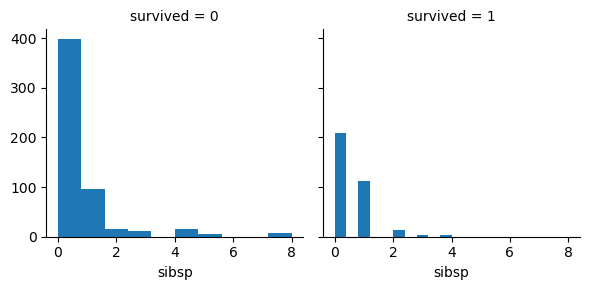

In [58]:
g1=sns.FacetGrid(df, col='survived')
g1.map(plt.hist,'sibsp')

- 탑승석이 높을 수록 생존율이 높을 것이다.

In [60]:
df[['pclass','survived']].groupby(['pclass']).mean().sort_values(by='survived',ascending=False)

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


C:\Users\pitap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


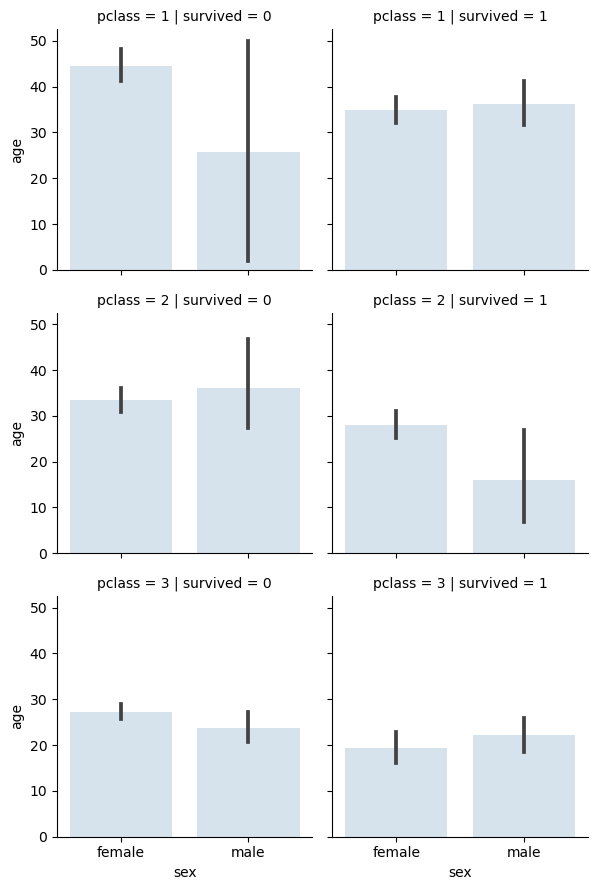

In [61]:
#barplot을 통해서도 여러가지 볼 수 있다.
g2=sns.FacetGrid(df, col='survived',row = 'pclass')
g2.map(sns.barplot,'sex', 'age',alpha=0.2)
g2.add_legend() #범례 설정 

- 나이가 어릴 수록 생존율이 높을 것이다.

In [62]:
df[['age','survived']].groupby(['survived']).mean().sort_values(by='survived',ascending=False)

,age
survived,
1,28.343690
0,30.626179


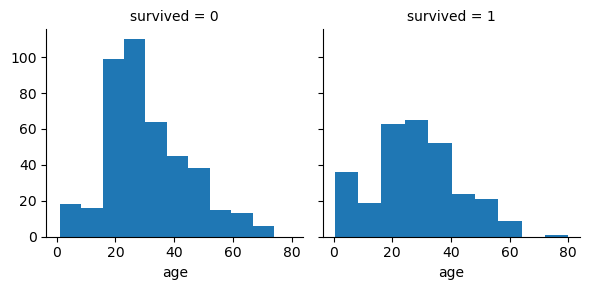

In [63]:
g3=sns.FacetGrid(df, col='survived')
g3.map(plt.hist,'age')